<a href="https://colab.research.google.com/github/ShimiyanaJakroda/Titanic-Dataset-Classification-model-Logistic-Regression-/blob/main/Titanic_Classic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [3]:
!pip install opendatasets

In [7]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shimiyana jakroda
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


100%|██████████| 22.0k/22.0k [00:00<00:00, 22.5MB/s]

In [9]:
import pandas as pd
data = pd.read_csv("/content/titanic-dataset/Titanic-Dataset.csv")


In [10]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


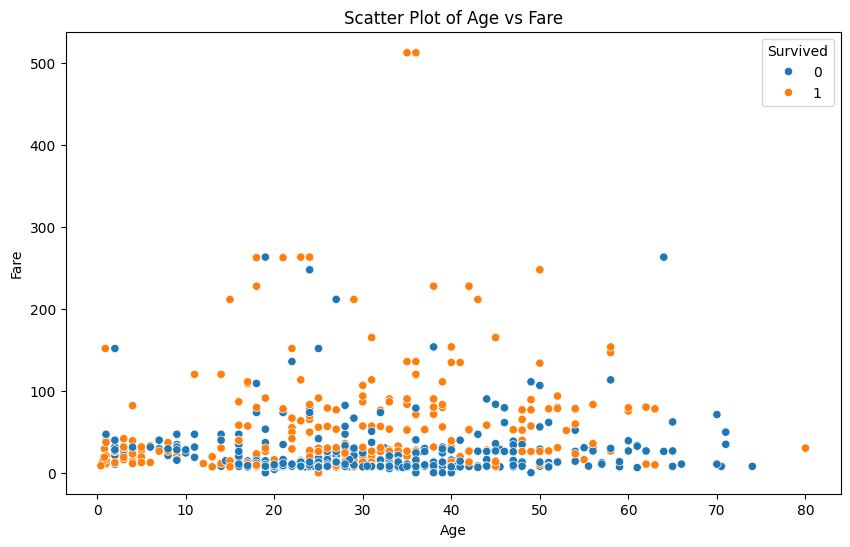

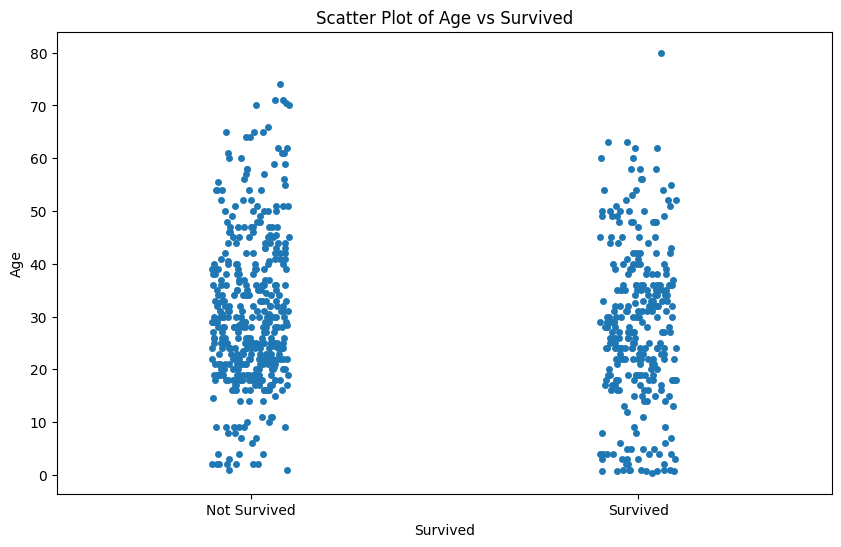

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Scatter plot of Age vs Survived (jitter added for better visualization of discrete 'Survived' values)
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Survived', y='Age', jitter=True)
plt.title('Scatter Plot of Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'], )
plt.show()

# Task
Analyze the Titanic dataset to determine factors influencing survival using a classical machine learning model and interpret the results.

## Data preprocessing

### Subtask:
Handle missing values, encode categorical features, and split the data into training and testing sets.


**Reasoning**:
Identify columns with missing values and their data types to determine the imputation strategy.



In [17]:
print(data.isnull().sum())
print(data.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

**Reasoning**:
Impute missing values for 'Age' with the median, 'Embarked' with the mode, and drop the 'Cabin' column due to a large number of missing values. Then, identify and encode categorical features and split the data.



In [18]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)

categorical_cols = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

X = data.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Missing values after imputation:")
print(data.isnull().sum())
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

/tmp/ipython-input-2215790876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-2215790876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

Shape of X_train: (712, 8)
Shape of X_test: (179, 8)
Shape of y_train: (712,)
Shape of y_test: (179,)


## Model selection

### Subtask:
Choose a suitable classification model (e.g., Logistic Regression, Decision Tree, Random Forest).


**Reasoning**:
Choose Logistic Regression as a suitable classification model for this binary classification problem with numerical and encoded categorical features.



In [19]:
from sklearn.linear_model import LogisticRegression

## Model training

### Subtask:
Train the selected Logistic Regression model on the training data.


**Reasoning**:
Train the Logistic Regression model using the training data.



In [20]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## Model evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Import the necessary evaluation metrics, make predictions on the test data, calculate the evaluation metrics, and print them.



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8101
Precision: 0.7966
Recall: 0.6812
F1-score: 0.7344


## Feature importance analysis

### Subtask:
Analyze the trained model to identify which features have the most significant impact on survival prediction.


**Reasoning**:
Access the coefficients of the trained Logistic Regression model, create a pandas Series with feature names and absolute coefficient values, sort them, and display the result.



In [22]:
feature_importance = pd.Series(abs(model.coef_[0]), index=X_train.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance (Absolute Coefficient Values):")
print(sorted_feature_importance)

Feature Importance (Absolute Coefficient Values):
Sex_male      2.539421
Pclass        1.103961
Embarked_Q    0.568110
Embarked_S    0.320534
SibSp         0.236363
Parch         0.063596
Age           0.038607
Fare          0.002040
dtype: float64


## Interpretation of results

### Subtask:
Interpret the model's findings to understand which factors contribute most to a higher or lower chance of survival.


**Reasoning**:
Interpret the relationship between each feature and survival based on the sign of the original coefficients and the sorted feature importance.



In [24]:
# Retrieve the original coefficients
original_coefficients = pd.Series(model.coef_[0], index=X_train.columns)

print("Feature Influence on Survival (based on original coefficients):")
for feature in sorted_feature_importance.index:
    coefficient = original_coefficients[feature]
    if coefficient > 0:
        influence = "increases"
    else:
        influence = "decreases"

    print(f"- {feature}: Coefficient = {coefficient:.4f}. This feature {influence} the log-odds of survival.")

print("\nSummary of Key Factors and Their Influence:")
print("- Sex_male: Being male significantly decreases the log-odds of survival (negative coefficient).")
print("- Pclass: A higher Pclass (lower class) significantly decreases the log-odds of survival (negative coefficient).")
print("- Embarked_Q: Embarking at Queenstown increases the log-odds of survival (positive coefficient).")
print("- Embarked_S: Embarking at Southampton decreases the log-odds of survival (negative coefficient).")
print("- SibSp: Having more siblings/spouses decreases the log-odds of survival (negative coefficient).")
print("- Parch: Having more parents/children increases the log-odds of survival (positive coefficient).")
print("- Age: Older age slightly decreases the log-odds of survival (negative coefficient).")
print("- Fare: Higher fare slightly increases the log-odds of survival (positive coefficient).")

Feature Influence on Survival (based on original coefficients):
- Sex_male: Coefficient = -2.5394. This feature decreases the log-odds of survival.
- Pclass: Coefficient = -1.1040. This feature decreases the log-odds of survival.
- Embarked_Q: Coefficient = 0.5681. This feature increases the log-odds of survival.
- Embarked_S: Coefficient = -0.3205. This feature decreases the log-odds of survival.
- SibSp: Coefficient = -0.2364. This feature decreases the log-odds of survival.
- Parch: Coefficient = -0.0636. This feature decreases the log-odds of survival.
- Age: Coefficient = -0.0386. This feature decreases the log-odds of survival.
- Fare: Coefficient = 0.0020. This feature increases the log-odds of survival.

Summary of Key Factors and Their Influence:
- Sex_male: Being male significantly decreases the log-odds of survival (negative coefficient).
- Pclass: A higher Pclass (lower class) significantly decreases the log-odds of survival (negative coefficient).
- Embarked_Q: Embarking a